# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan adalah dataset Students Performance yang menyatakan kumpulan data berisi nilai yang diperoleh oleh siswa di mata berbagai mata pelajaran. Dataset terdiri dari 8 coloumn dan 1001 baris. Dataset ini diabmbil dari kaggle dengan tautan dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For display settings
pd.set_option('display.max_columns', None)


# **3. Memuat Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# load dataset
import pandas as pd

# ganti path sesuai lokasi penyimpanan kamu
path = "/content/drive/MyDrive/PROYEK AKHIR/StudentsPerformance.csv"

df = pd.read_csv("/content/drive/MyDrive/PROYEK AKHIR/StudentsPerformance.csv")

# tampilkan 5 baris awal
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

5 Baris Awal Dataset


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Statistik Deskriptif


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Jumlah Missing Values


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0



Distribusi Fitur Numerik


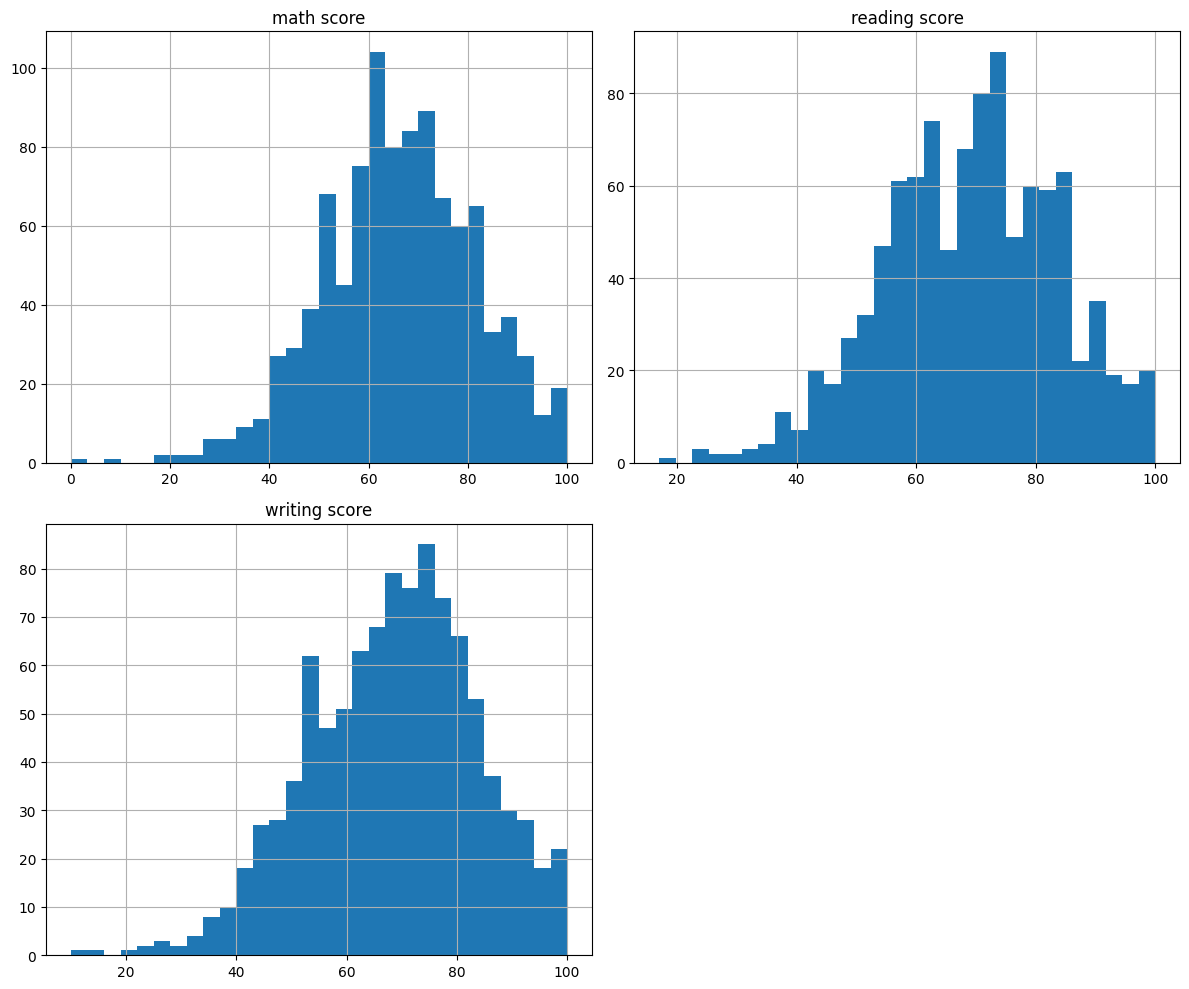


Korelasi Antar Fitur 


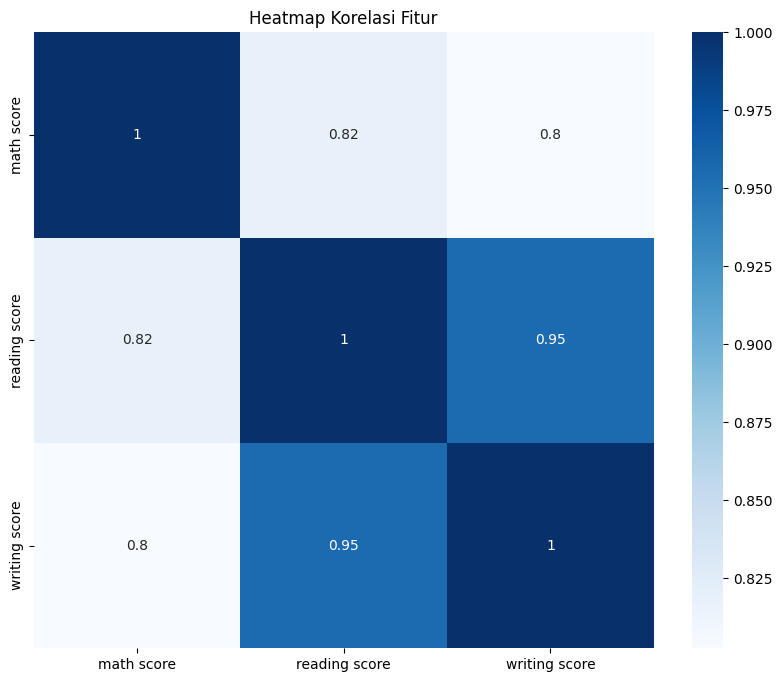


Scatterplot Feature vs Target


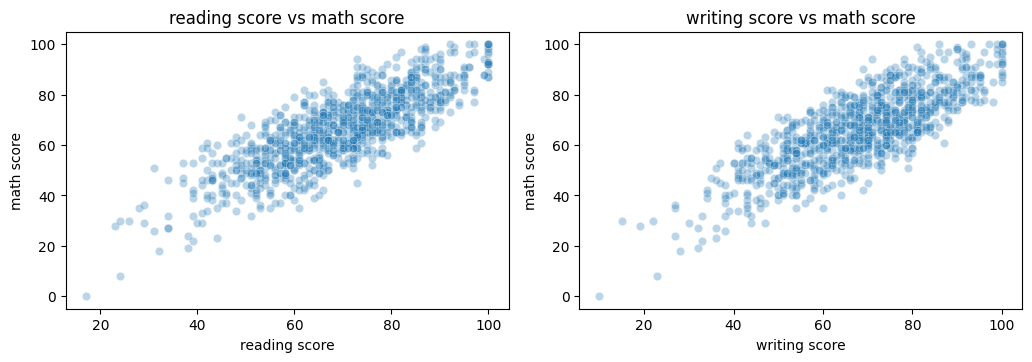

In [4]:
#Type your code here
# menampilkan 5 baris awal dataset
print("5 Baris Awal Dataset")
display(df.head())

# menampilkan informasi dataset
print("\nInfo Dataset")
df.info()

# statistik deskriptif
print("\nStatistik Deskriptif")
display(df.describe())

# memeriksa missing values
print("\nJumlah Missing Values")
display(df.isnull().sum())

# distribusi setiap fitur numerik
print("\nDistribusi Fitur Numerik")
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# heatmap korelasi
print("\nKorelasi Antar Fitur ")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues") # Added numeric_only=True and annot=True for better readability
plt.title("Heatmap Korelasi Fitur")
plt.show()

# scatterplot hubungan feature dengan target
target = "math score" # Changed target to a valid column in StudentsPerformance.csv

print("\nScatterplot Feature vs Target")
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    if col != target:
        plt.subplot(3, 3, i+1) # Adjusted subplot grid for better layout with 3 numeric score columns
        sns.scatterplot(x=df[col], y=df[target], alpha=0.3)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f'{col} vs {target}') # Added title for clarity
plt.tight_layout()
plt.show()

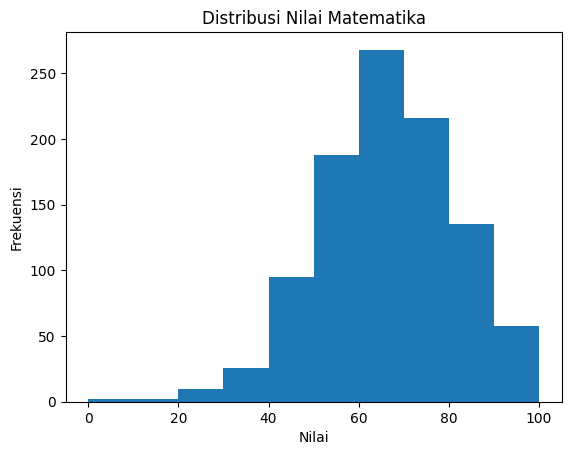

In [5]:
# distribusi skor matematika
plt.hist(df['math score'])
plt.title("Distribusi Nilai Matematika")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()

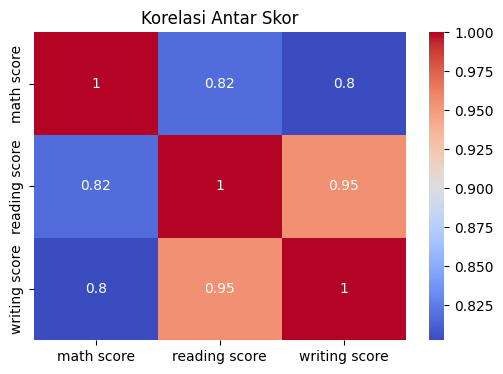

In [6]:
# heatmap korelasi untuk skor numerik
plt.figure(figsize=(6,4))
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Skor")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
df_clean = df.copy()

In [8]:
# periksan dan tangani missing values
print(df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())


# jika tidak ada missing value
if df.isnull().sum().sum() == 0:
    print("\n✔ Dataset TIDAK memiliki missing value.")
else:
    print("\n⚠ Dataset memiliki missing value, melakukan handling...")


    # pisahkan numerik & kategorikal
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # imputasi numerik (mean)
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


    # imputasi kategorikal (mode)
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    print("\n✔ Missing value berhasil ditangani.")
    print(df.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Total missing values: 0

✔ Dataset TIDAK memiliki missing value.


In [9]:
# periksa dan hapus duplikat baris
print("\nJumlah data duplikat:", df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()


Jumlah data duplikat: 0


In [10]:
# encoding kolom kategorikal
le = LabelEncoder()

categorical_cols = ['gender','race/ethnicity','parental level of education',
                    'lunch','test preparation course']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [11]:
# menentukan fitur dan target
X = df.drop(columns=['math score'])
y = df['math score']

In [12]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [13]:
# scalling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# training model
# linear reggresion
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# evaluasi model
def evaluate(model, X_test, y_test):
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    return mae, mse, rmse, r2

In [16]:
# evaluasi linear regression
lr_results = evaluate(model_lr, X_test_scaled, y_test)
print("Linear Regression")
print(f"MAE : {lr_results[0]:.2f}")
print(f"MSE : {lr_results[1]:.2f}")
print(f"RMSE: {lr_results[2]:.2f}")
print(f"R²  : {lr_results[3]:.2f}")


Linear Regression
MAE : 4.13
MSE : 28.28
RMSE: 5.32
R²  : 0.88


In [17]:
# prediksi contoh data siswa baru
new_data = pd.DataFrame({
    'gender':[0],
    'race/ethnicity':[2],
    'parental level of education':[2],
    'lunch':[1],
    'test preparation course':[1],
    'reading score':[72],
    'writing score':[70]
})

new_scaled = scaler.transform(new_data)

print("Prediksi Math Score (Linear Regression) =",
      model_lr.predict(new_scaled)[0])

Prediksi Math Score (Linear Regression) = 64.14817396781818


In [18]:
# simpan hasil preprocessing
df.to_csv("dataset_preprocessed.csv", index=False)
